Dataset Shape: (284807, 31)

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20 

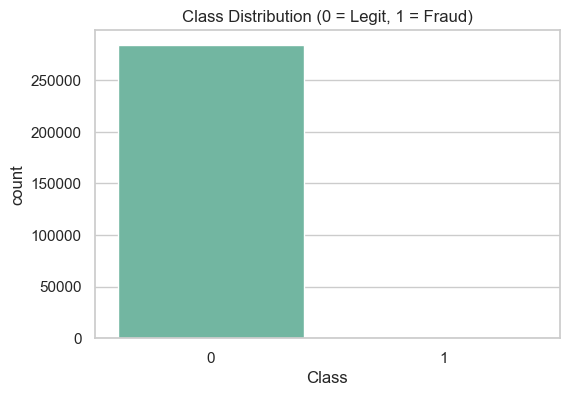


Statistical Summary:

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00

In [54]:
# STEP 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look better
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# STEP 2: Load Dataset
df = pd.read_csv('creditcard.csv')

# STEP 3: Basic Info
print("Dataset Shape:", df.shape)
print("\nDataset Info:\n")
print(df.info())

# STEP 4: Check Missing Values
print("\nMissing Values:\n")
print(df.isnull().sum())

# STEP 5: Class Distribution
print("\nClass Distribution:\n")
print(df['Class'].value_counts())

# STEP 6: Plot Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df, palette='Set2')
plt.title('Class Distribution (0 = Legit, 1 = Fraud)')
plt.show()

# STEP 7: Statistical Summary
print("\nStatistical Summary:\n")
print(df.describe())


In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# STEP 1: Scale 'Amount' and 'Time' (rest features are already scaled PCA components)
df['scaled_amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = StandardScaler().fit_transform(df['Time'].values.reshape(-1, 1))

# Drop old 'Amount' and 'Time' columns
df.drop(['Amount', 'Time'], axis=1, inplace=True)

# Reorder columns
df = df[['scaled_time', 'scaled_amount'] + [col for col in df.columns if col not in ['scaled_time', 'scaled_amount', 'Class']] + ['Class']]

# STEP 2: Separate fraud and normal
fraud_df = df[df['Class'] == 1]
legit_df = df[df['Class'] == 0]

print("Original class counts:")
print(df['Class'].value_counts())

# STEP 3: Undersample normal transactions to match fraud count
legit_sample = legit_df.sample(n=len(fraud_df), random_state=42)
balanced_df = pd.concat([fraud_df, legit_sample], axis=0)

print("\nBalanced class counts:")
print(balanced_df['Class'].value_counts())

# STEP 4: Shuffle the data
balanced_df = balanced_df.sample(frac=1, random_state=42)

# STEP 5: Split into features & target
X = balanced_df.drop('Class', axis=1)
y = balanced_df['Class']

# STEP 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


Original class counts:
Class
0    284315
1       492
Name: count, dtype: int64

Balanced class counts:
Class
1    492
0    492
Name: count, dtype: int64


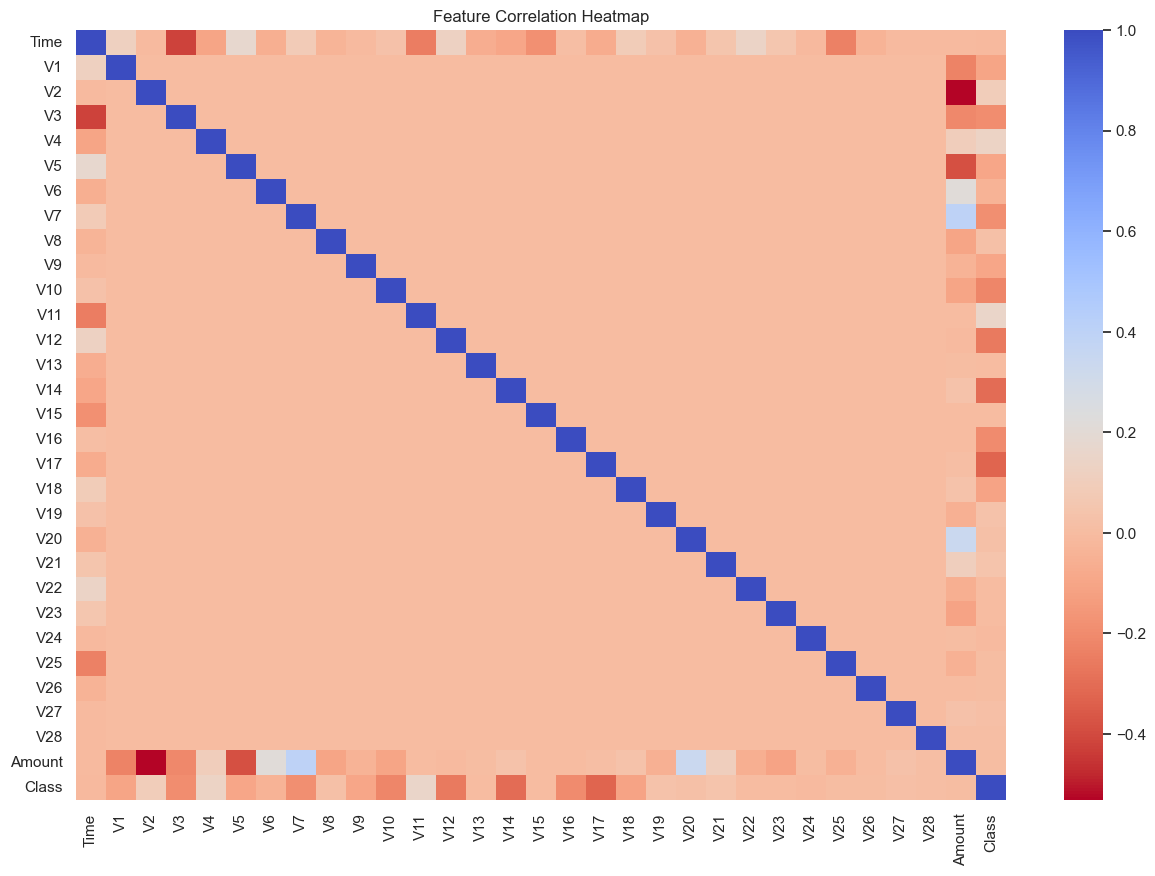


--- Isolation Forest ---


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Confusion Matrix:
 [[283955    360]
 [   367    125]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9987    0.9987    0.9987    284315
           1     0.2577    0.2541    0.2559       492

    accuracy                         0.9974    284807
   macro avg     0.6282    0.6264    0.6273    284807
weighted avg     0.9974    0.9974    0.9974    284807


--- Local Outlier Factor ---
Confusion Matrix:
 [[283855    460]
 [   467     25]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9984    0.9984    0.9984    284315
           1     0.0515    0.0508    0.0512       492

    accuracy                         0.9967    284807
   macro avg     0.5250    0.5246    0.5248    284807
weighted avg     0.9967    0.9967    0.9967    284807



In [45]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report, confusion_matrix

# STEP 1: Quick Feature Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), cmap='coolwarm_r', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

# STEP 2: Prepare data for anomaly detection
X_anomaly = df.drop('Class', axis=1)
y_anomaly = df['Class']

# STEP 3: Define outlier detection methods
classifiers = {
    "Isolation Forest": IsolationForest(n_estimators=100, contamination=0.0017, random_state=42),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20, contamination=0.0017)
}

# STEP 4: Fit and evaluate each
for clf_name, clf in classifiers.items():
    print(f"\n--- {clf_name} ---")
    
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X_anomaly)
        scores = clf.negative_outlier_factor_
    else:
        clf.fit(X_anomaly)
        y_pred = clf.predict(X_anomaly)  # Also DataFrame


    # Convert predictions: 1 → legit, -1 → fraud
    y_pred = np.where(y_pred == 1, 0, 1)

    print("Confusion Matrix:\n", confusion_matrix(y_anomaly, y_pred))
    print("\nClassification Report:\n", classification_report(y_anomaly, y_pred, digits=4))


In [27]:
pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 1.6 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


Confusion Matrix:
 [[96  3]
 [ 8 90]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9231    0.9697    0.9458        99
           1     0.9677    0.9184    0.9424        98

    accuracy                         0.9442       197
   macro avg     0.9454    0.9440    0.9441       197
weighted avg     0.9453    0.9442    0.9441       197

ROC-AUC Score: 0.9812


/opt/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [12:05:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


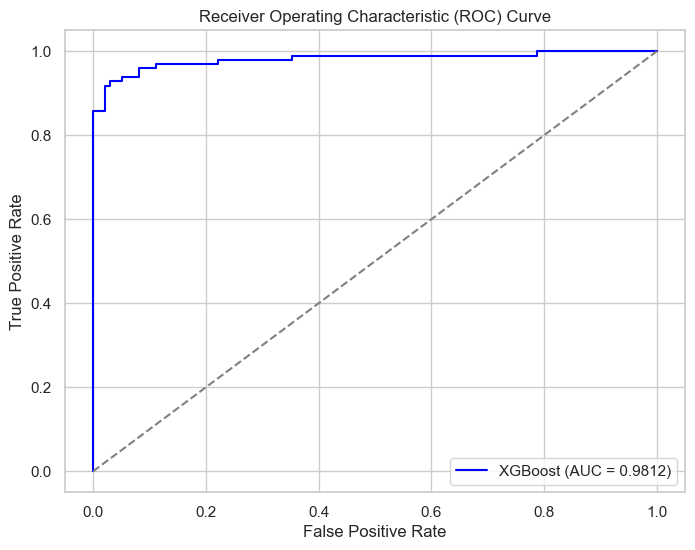

In [58]:
# STEP 7: Train XGBoost Classifier
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train, y_train)

# Predict class labels and probabilities
y_pred = xgb_clf.predict(X_test)
y_prob = xgb_clf.predict_proba(X_test)[:, 1]  # Probability for ROC
# STEP 8: Evaluate Model
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# Confusion Matrix & Classification Report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")
# STEP 9: Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.4f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()



In [64]:
import joblib
joblib.dump(xgb_clf, "xgb_model.pkl")


['xgb_model.pkl']

In [62]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


zsh:1: command not found: st
